In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import assessment.studies.budget_components_coupling.helpers as helper
from mmctools.helper_functions import calc_wind, covariance
from mmctools.plotting import plot_timehistory_at_height, plot_profile

# Comparison of turbulence metrics calculated by planar/temporal averaging
written by [Eliot Quon](mailto:eliot.quon@nrel.gov)

This notebook depends on:

SOWFA simulations
* run.tency.w0_L0
* run.tency.w60_L0
* run.tency.w120_L0
* run.tency.w180_L0
* run.tency.w0_L6000
* run.tency.w60_L6000
* run.tency.w120_L6000
* run.tency.w180_L6000
* run.tency.w0_L24000
* run.tency.w60_L24000
* run.tency.w120_L24000
* run.tency.w180_L24000

reference data:
* TTU tower data, generated in process_TTU_tower.ipynb

Main directories on Eagle

In [3]:
datadir = '/projects/mmc/dallaert/budget_component_coupling'
referencedir = '/projects/mmc/dallaert/referenceData'

Name of SOWFA simulation folders

In [4]:
prefix = 'run.tency.'
simulation_data = {
    'L3_T0':    os.path.join(datadir,prefix+'w0_L0'),
    'L3_T60':   os.path.join(datadir,prefix+'w60_L0'),
    'L3_T120':  os.path.join(datadir,prefix+'w120_L0'),
    'L3_T180':  os.path.join(datadir,prefix+'w180_L0'),
    'L9_T0':    os.path.join(datadir,prefix+'w0_L6000'),
    'L9_T60':   os.path.join(datadir,prefix+'w60_L6000'),
    'L9_T120':  os.path.join(datadir,prefix+'w120_L6000'),
    'L9_T180':  os.path.join(datadir,prefix+'w180_L6000'),
    'L27_T0':   os.path.join(datadir,prefix+'w0_L24000'),
    'L27_T60':  os.path.join(datadir,prefix+'w60_L24000'),
    'L27_T120': os.path.join(datadir,prefix+'w120_L24000'),
    'L27_T180': os.path.join(datadir,prefix+'w180_L24000'),
}

Reference data

In [5]:
# Datasets generated in process_TTU_tower.ipynb, which can be found in
# a2e-mmc/assessment/datasets/SWiFT/
tower_data_10min = 'TTU_tilt_corrected_20131108-09_10min.csv'

In [6]:
zhub = 80.
selected_times = ['2013-11-08 18:00:00','2013-11-08 22:00:00','2013-11-09 06:00:00']

## load microscale data

In [7]:
%%time
micro_pavg_10min = {}
for name in simulation_data.keys():
    print('Loading simulation '+name)
    
    fpath = os.path.join(simulation_data[name],'postProcessing','planarAverages')
    df = helper.reader_planar_average(fpath)
    
    # Resample data to 10-min averages
    df_10min = df.unstack().resample('10min').mean().stack()
    
    # Calculate some quantities of interest
    helper.calc_QOIs(df_10min)
    
    # Store result in dictionary
    micro_pavg_10min[name] = df_10min
    
# CPU times: user 7min, sys: 42.1 s, total: 7min 42s
# Wall time: 7min 50s

Loading simulation L3_T0
Simulation (re)start times: [43200.0, 72000.0]
  read U
  read UU
  read T
Creating dataframe for [ 43200.   43202.5  43205.  ... 129595.  129597.5 129600. ]
Loading simulation L3_T60
Simulation (re)start times: [43200.0]
  read U
  read UU
  read T
Creating dataframe for [ 43200.   43202.5  43205.  ... 129595.  129597.5 129600. ]
Loading simulation L3_T120
Simulation (re)start times: [43200.0]
  read U
  read UU
  read T
Creating dataframe for [ 43200.   43202.5  43205.  ... 129595.  129597.5 129600. ]
Loading simulation L3_T180
Simulation (re)start times: [43200.0]
  read U
  read UU
  read T
Creating dataframe for [ 43200.   43202.5  43205.  ... 129595.  129597.5 129600. ]
Loading simulation L9_T0
Simulation (re)start times: [43200.0]
  read U
  read UU
  read T
Creating dataframe for [ 43200.   43202.5  43205.  ... 129595.  129597.5 129600. ]
Loading simulation L9_T60
Simulation (re)start times: [43200.0]
  read U
  read UU
  read T
Creating dataframe for [

In [8]:
%%time
micro_tavg_10min = {}
for name in simulation_data.keys():
    print('Loading simulation '+name)
    
    fpath = os.path.join(simulation_data[name],'postProcessing','probe1')
    df_prob = helper.reader_probe(fpath)

    # Compute wind speed and wind direction
    df_prob['wspd'], df_prob['wdir'] = calc_wind(df_prob)
    
    # Calculate 10-min statistics and quantities of interest
    df_prob_10min = helper.calc_stats(df_prob)
    helper.calc_QOIs(df_prob_10min)
    
    # Store result in dictionary
    micro_tavg_10min[name] = df_prob_10min

# CPU times: user 18min 45s, sys: 3min 5s, total: 21min 51s
# Wall time: 22min 2s

Loading simulation L3_T0
Simulation (re)start times: [43200.0, 72000.0]
  read U
  read T
Creating dataframe for [ 43200.5  43201.   43201.5 ... 129599.  129599.5 129600. ]
Loading simulation L3_T60
Simulation (re)start times: [43200.0]
  read U
  read T
Creating dataframe for [ 43200.5  43201.   43201.5 ... 129599.  129599.5 129600. ]
Loading simulation L3_T120
Simulation (re)start times: [43200.0]
  read U
  read T
Creating dataframe for [ 43200.5  43201.   43201.5 ... 129599.  129599.5 129600. ]
Loading simulation L3_T180
Simulation (re)start times: [43200.0]
  read U
  read T
Creating dataframe for [ 43200.5  43201.   43201.5 ... 129599.  129599.5 129600. ]
Loading simulation L9_T0
Simulation (re)start times: [43200.0]
  read U
  read T
Creating dataframe for [ 43200.5  43201.   43201.5 ... 129599.  129599.5 129600. ]
Loading simulation L9_T60
Simulation (re)start times: [43200.0]
  read U
  read T
Creating dataframe for [ 43200.5  43201.   43201.5 ... 129599.  129599.5 129600. ]
L

## load reference data

In [9]:
tower_10min, _ = helper.load_tower_reference_data(os.path.join(referencedir,tower_data_10min))

## plots

### - hub-height quantities

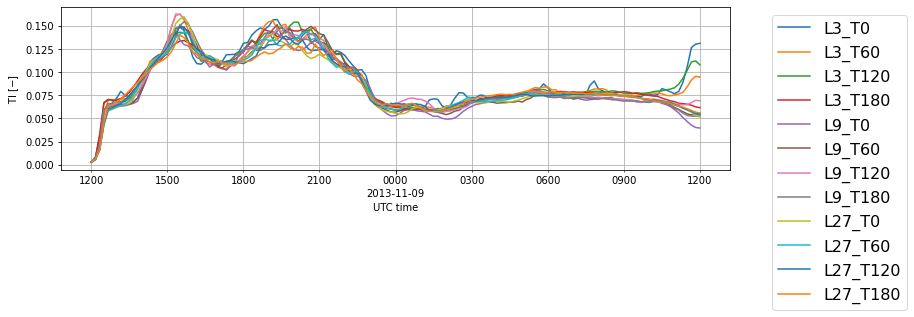

In [10]:
fig,ax = plot_timehistory_at_height(micro_pavg_10min,fields=['TI'],heights=zhub)

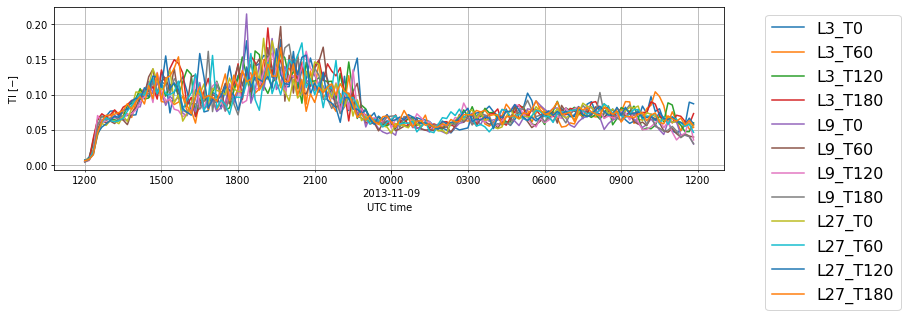

In [11]:
fig,ax = plot_timehistory_at_height(micro_tavg_10min,fields=['TI'],heights=zhub)

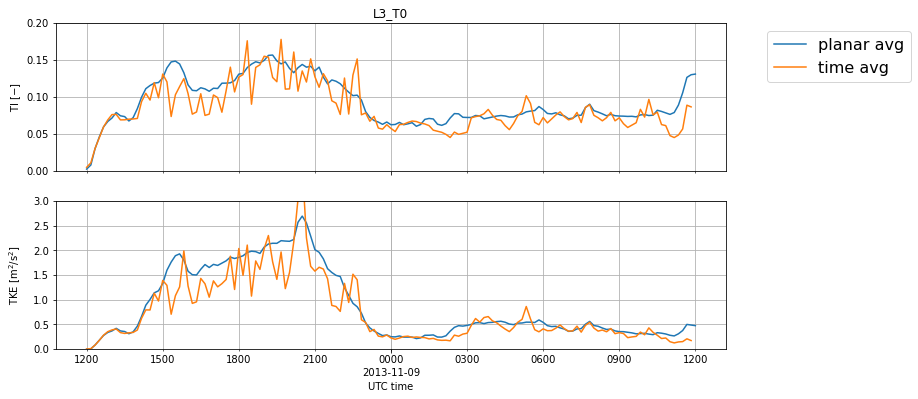

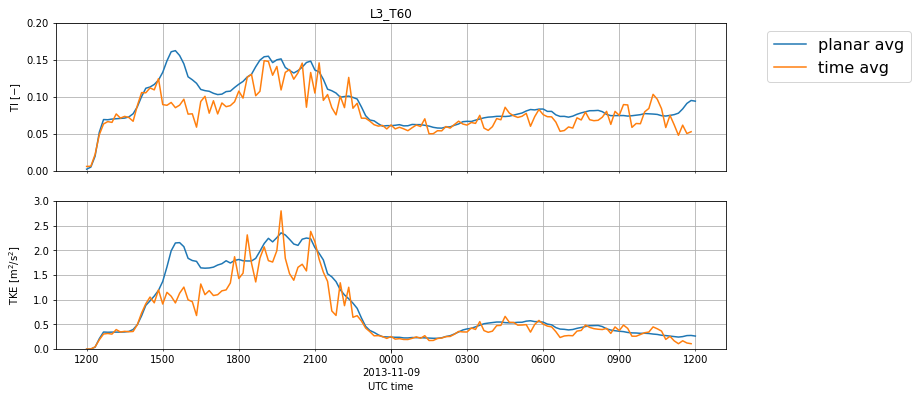

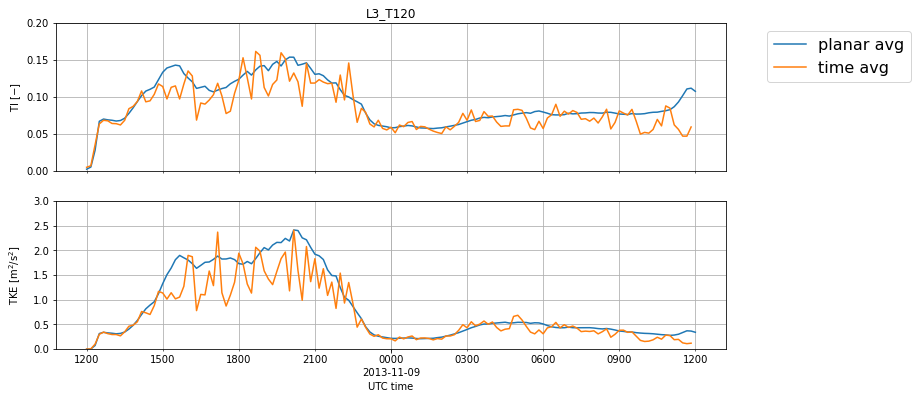

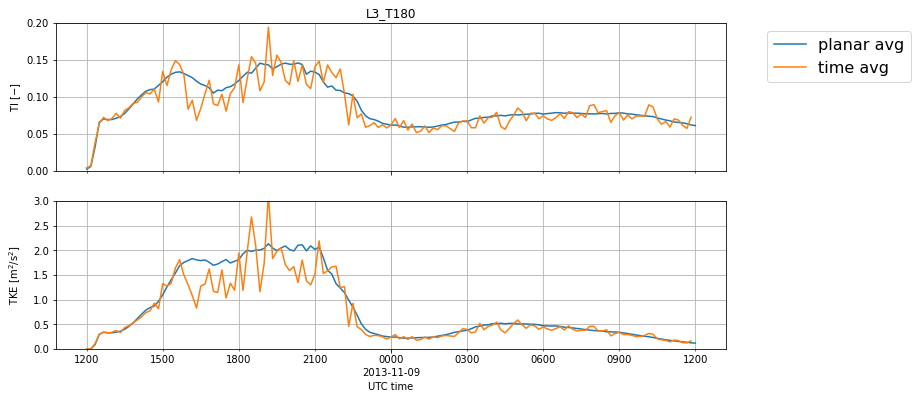

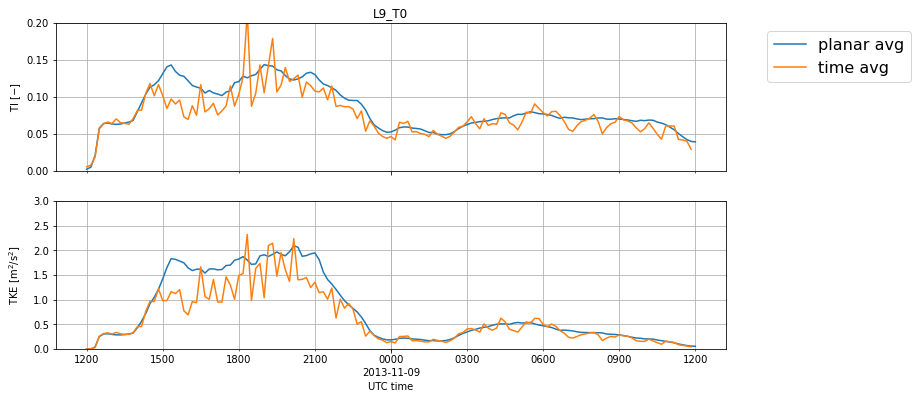

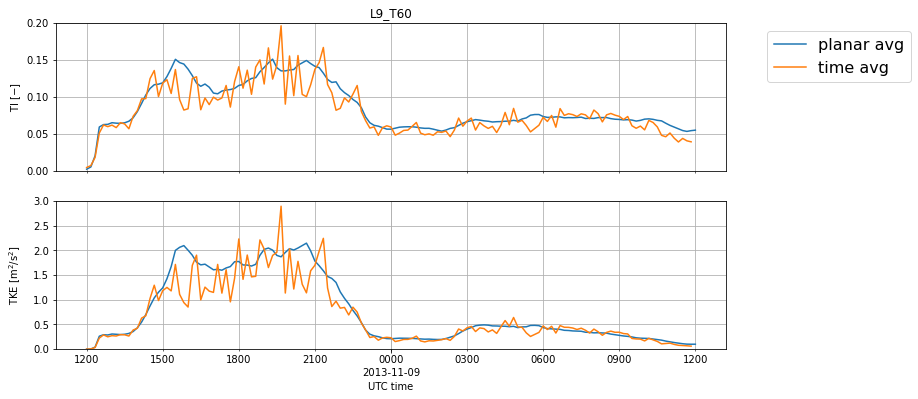

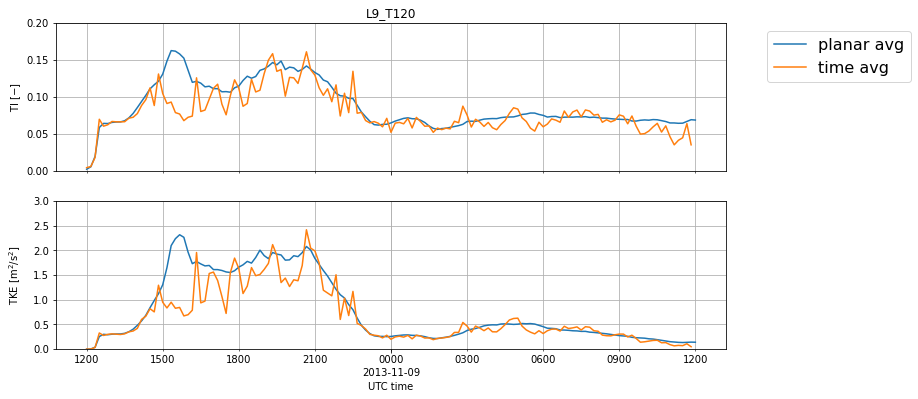

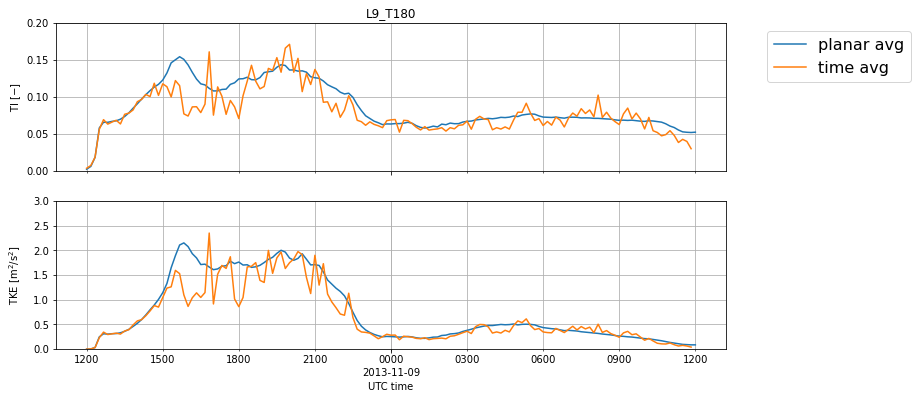

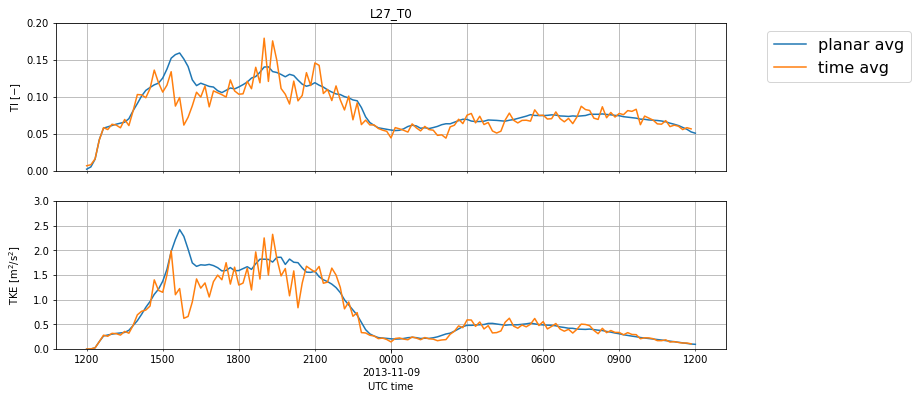

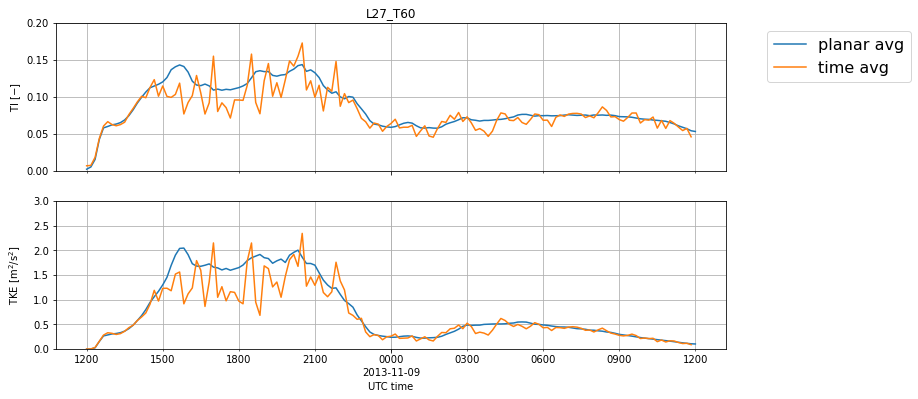

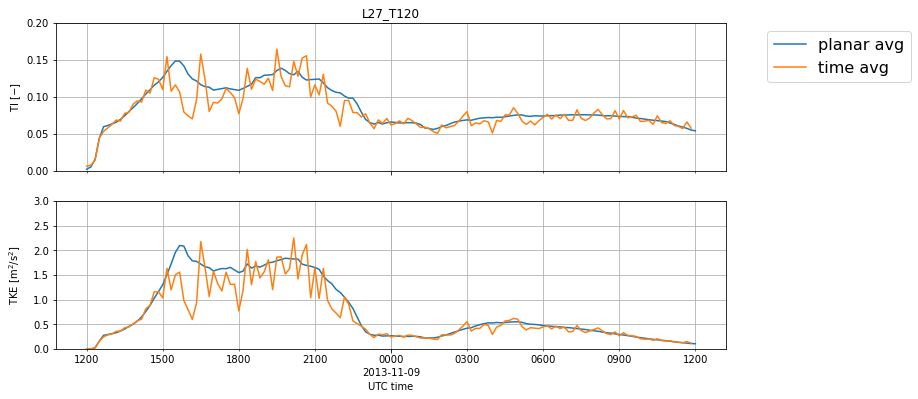

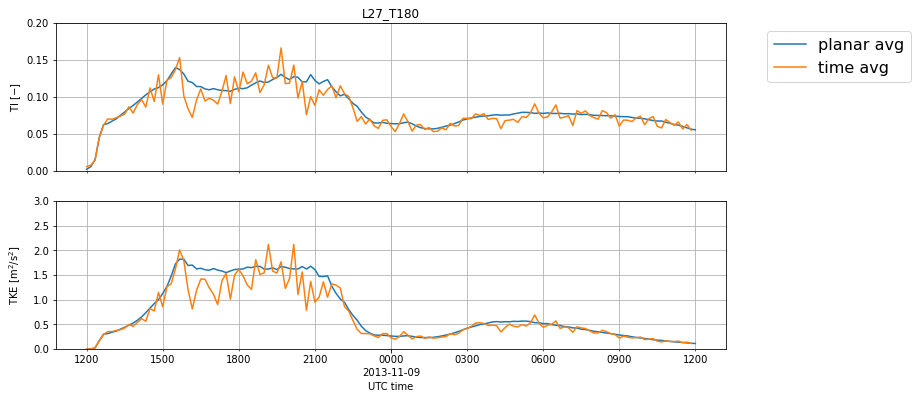

In [21]:
for name in simulation_data.keys():
    tmp = {'planar avg': micro_pavg_10min[name], 'time avg': micro_tavg_10min[name]}
    fig,ax = plot_timehistory_at_height(tmp,fields=['TI','TKE'],heights=zhub,
                                        fieldlimits={'TI':(0,0.2),'TKE':(0,3)})
    ax[0].set_title(name)
    fig.savefig('Figures/compare_turb_stats_HHhist-{:s}.png'.format(name), bbox_inches='tight')

### - profiles at selected times

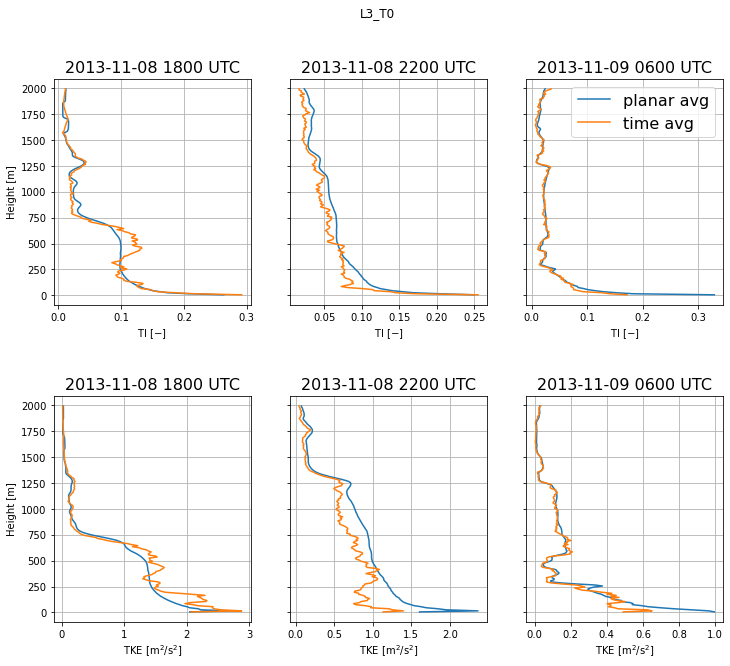

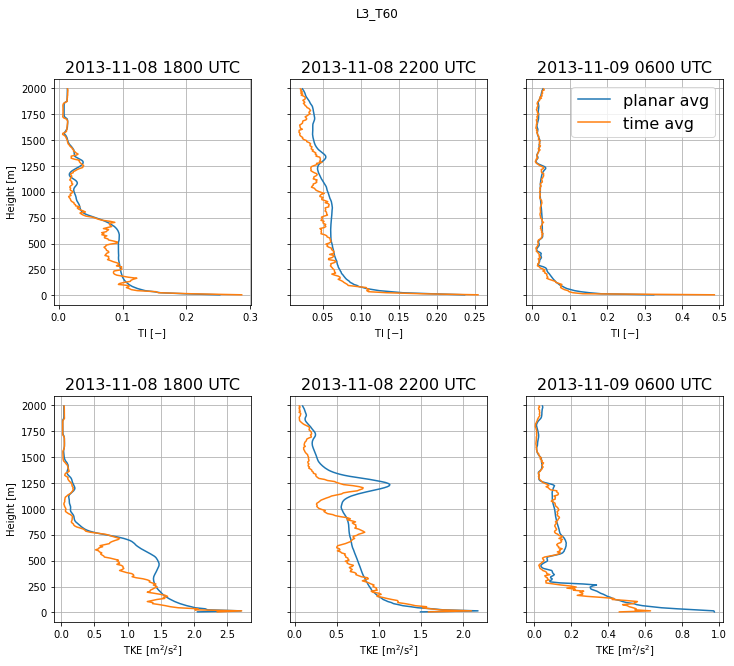

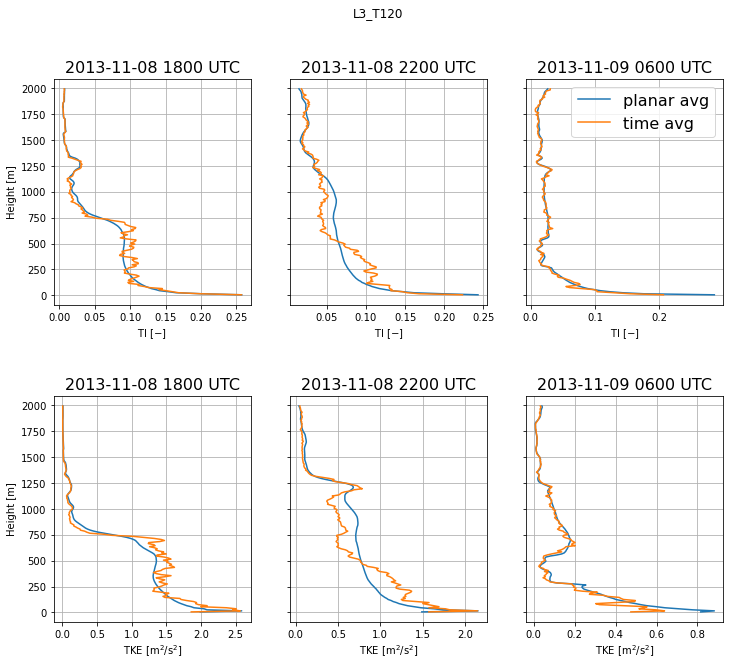

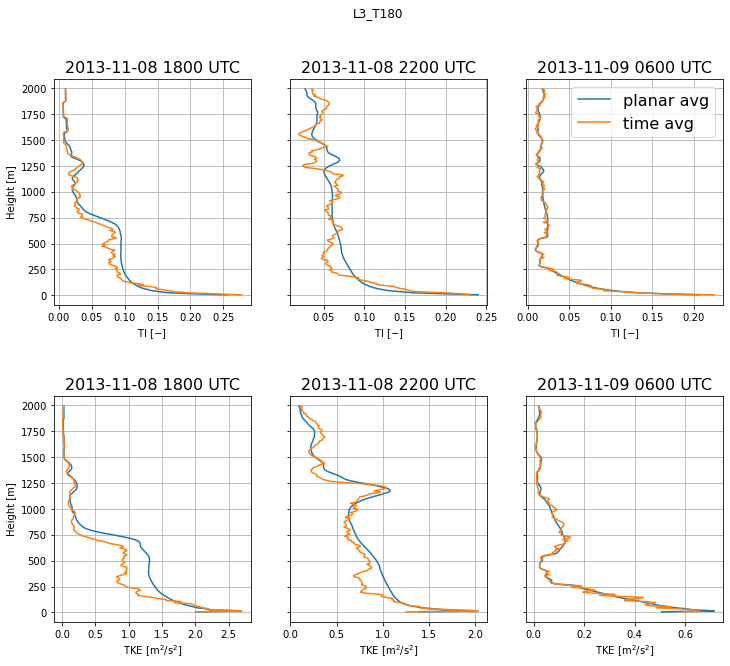

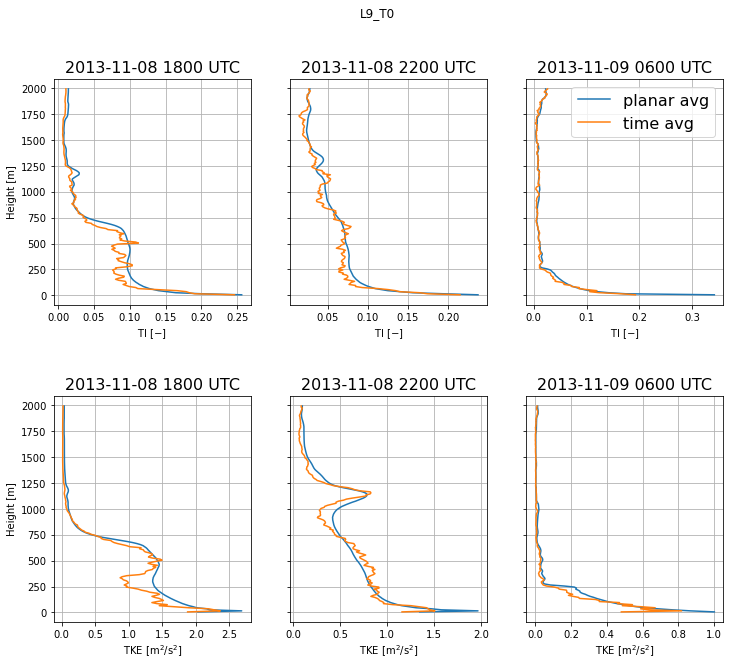

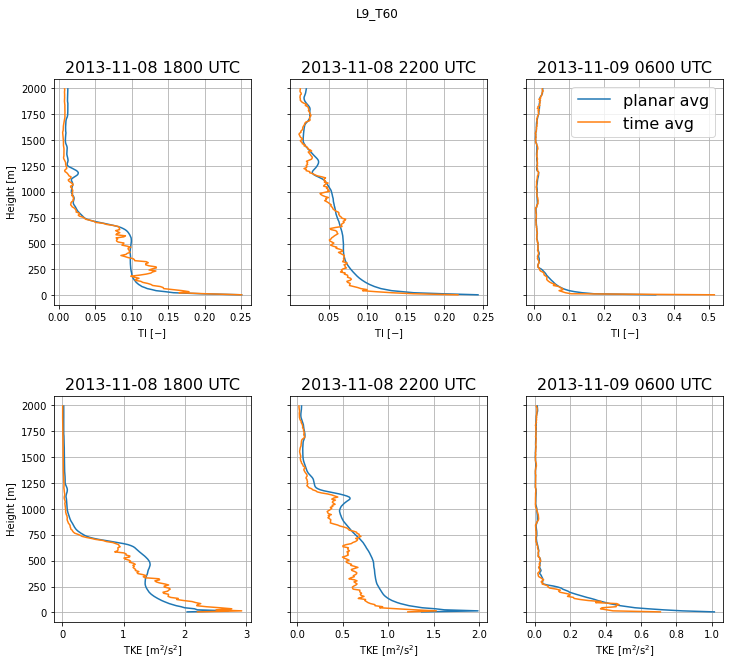

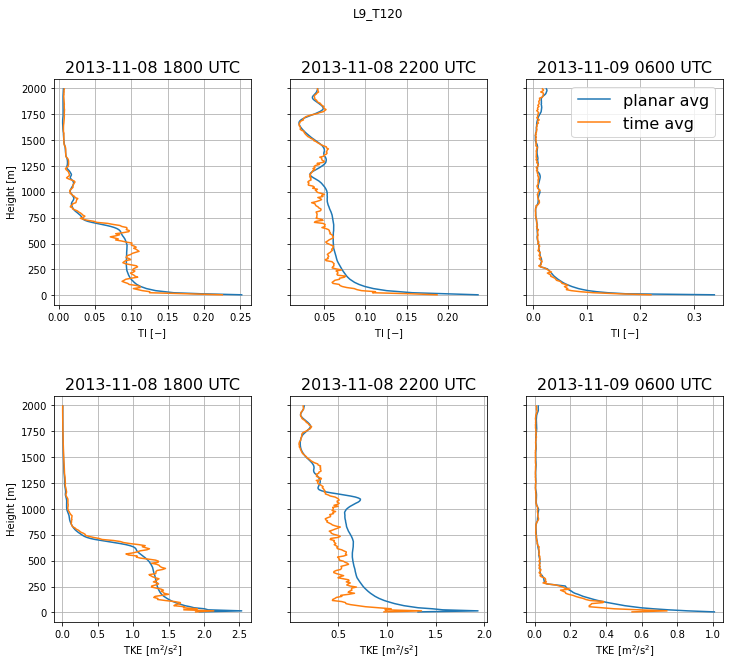

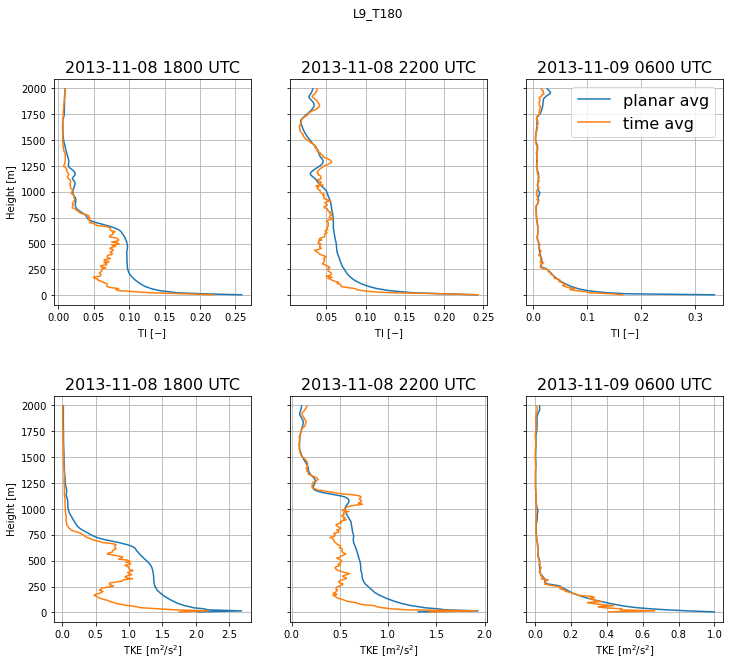

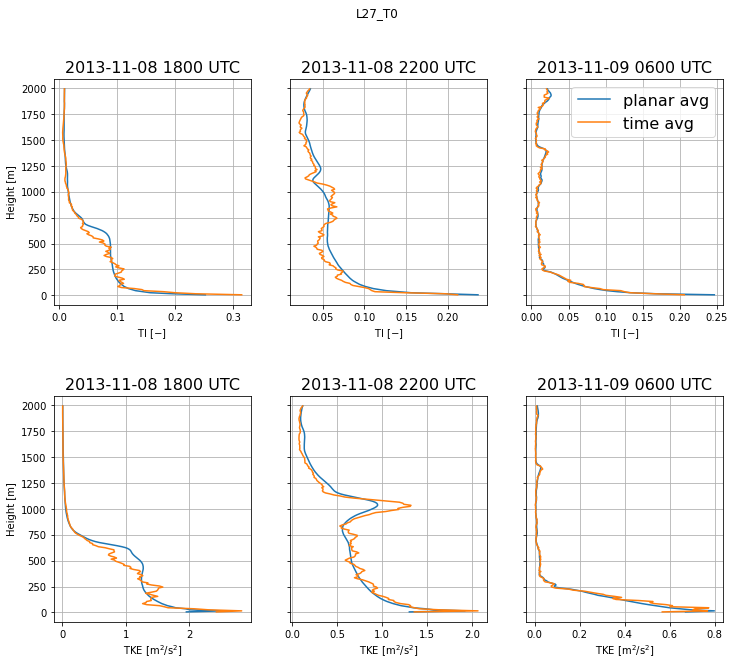

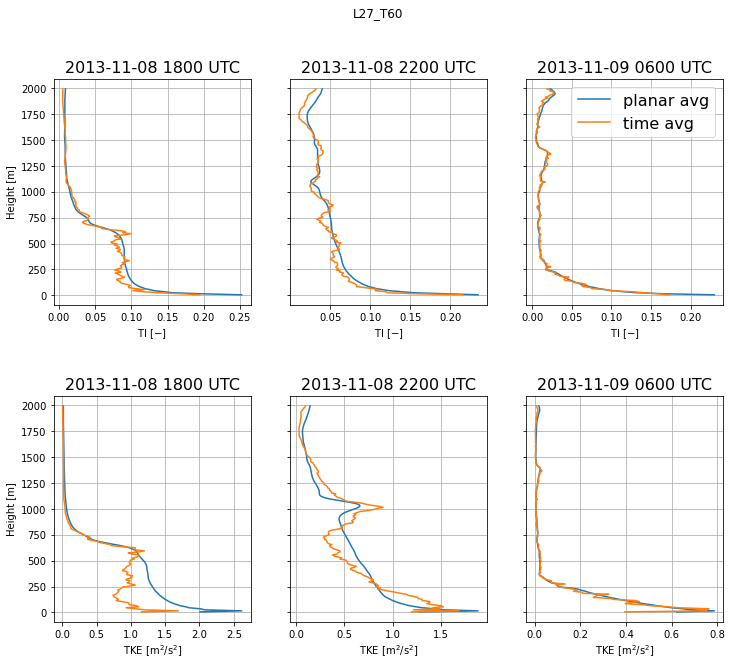

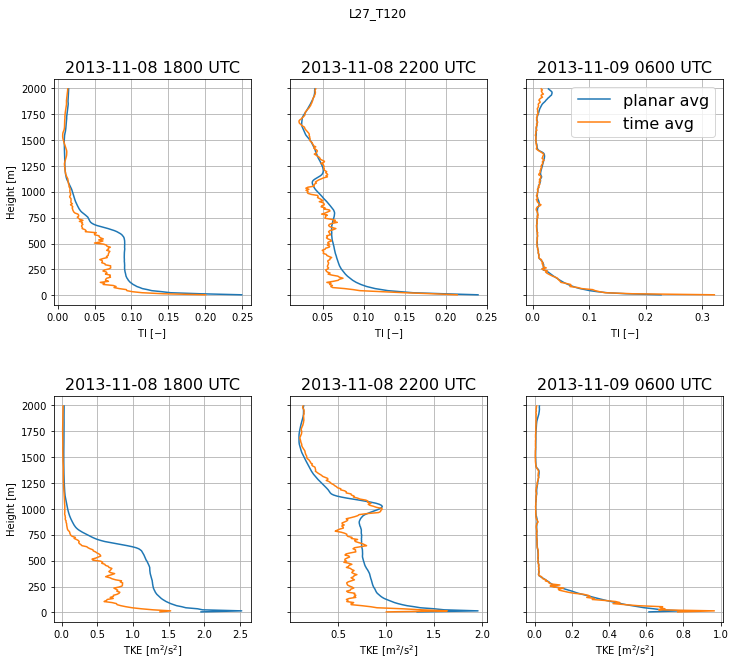

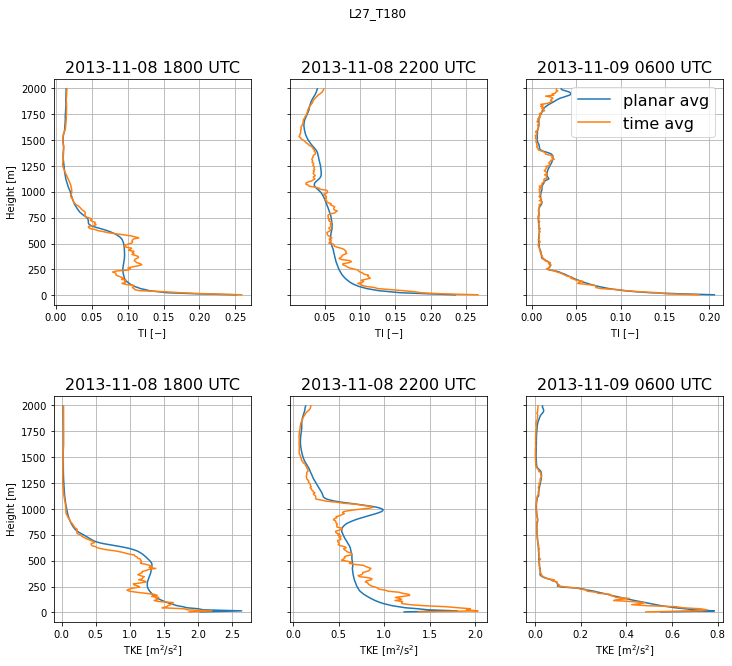

In [16]:
for name in simulation_data.keys():
    tmp = {'planar avg': micro_pavg_10min[name], 'time avg': micro_tavg_10min[name]}
    fig,ax = plot_profile(tmp,fields=['TI','TKE'],times=selected_times,stack_by_datasets=True)
    ax[0,2].legend(loc='upper right',fontsize=16)
    fig.suptitle(name)
    fig.savefig('Figures/compare_turb_stats_profiles-{:s}.png'.format(name), bbox_inches='tight')

## quantify differences

In [63]:
statscolumns = ['TI','TKE','u*']
diff = {}
for name in micro_pavg_10min.keys():
    ttmp = micro_tavg_10min[name][statscolumns]
    ptmp = micro_pavg_10min[name][statscolumns]
    ttmp.index.set_levels(ptmp.index.levels[1], level=1, inplace=True)
    d = ttmp - ptmp
    d['TKE_norm'] = d['TKE'] / ptmp['TKE']
    diff[name] = d

In [64]:
for name,df in diff.items():
    print(name)
    print(df.xs(85,level='height').describe())

L3_T0
               TI         TKE          u*    TKE_norm
count  144.000000  144.000000  145.000000  144.000000
mean    -0.008581   -0.121058   -0.018873   -0.083131
std      0.017808    0.276026    0.117078    0.463658
min     -0.073764   -1.062184   -0.453264   -0.713426
25%     -0.017507   -0.198090   -0.060150   -0.258222
50%     -0.006935   -0.060009   -0.012407   -0.132170
75%      0.001737    0.015332    0.034970    0.041385
max      0.045738    1.089832    0.306338    4.653328
L3_T60
               TI         TKE          u*    TKE_norm
count  144.000000  144.000000  145.000000  144.000000
mean    -0.010650   -0.149585   -0.026098   -0.100598
std      0.018424    0.283192    0.084480    0.358831
min     -0.083116   -1.264926   -0.370202   -0.649864
25%     -0.016357   -0.173112   -0.061490   -0.256474
50%     -0.005853   -0.051018   -0.020466   -0.117190
75%     -0.000714   -0.001485    0.019480   -0.003000
max      0.024237    0.513828    0.233791    3.309370
L3_T120
       

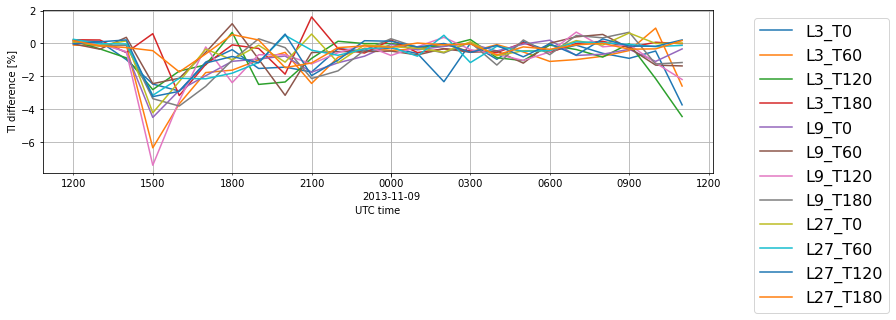

In [65]:
fig,ax = plot_timehistory_at_height({name: 100*df.unstack().resample('1h').median().stack() for name,df in diff.items()},
                                    fields=['TI'],heights=zhub,
                                    fieldlabels={'TI': 'TI difference [%]'})
fig.savefig('Figures/compare_TI_tavg_err', bbox_inches='tight')

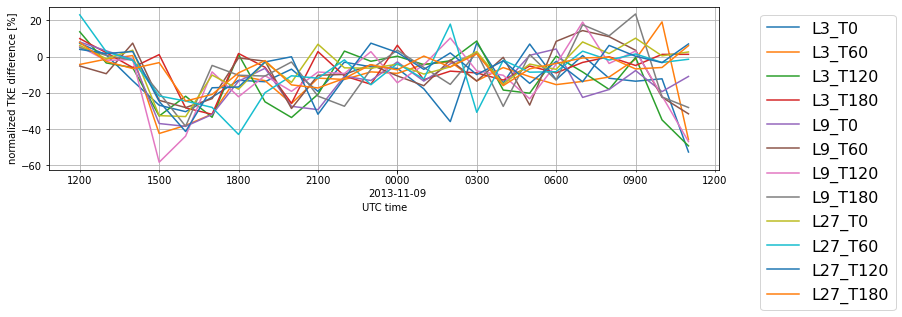

In [66]:
fig,ax = plot_timehistory_at_height({name: 100*df.unstack().resample('1h').median().stack() for name,df in diff.items()},
                                    fields=['TKE_norm'],heights=zhub,
                                    fieldlabels={'TKE_norm': 'normalized TKE difference [%]'})
fig.savefig('Figures/compare_norm_TKE_tavg_err', bbox_inches='tight')